In [1]:
from utils import *
from modules import *
import numpy as np 
import pandas as pd
from PIL import Image
import os
from os import listdir
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import rand_score,adjusted_rand_score
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time

import pickle as pkl

import warnings
warnings.filterwarnings("ignore")

# 1. Données MNIST Fashion

In [ ]:
mnist_data = pd.read_csv("data/fashion-mnist_train.csv")

X = mnist_data.drop(["label"], axis=1).values
y = mnist_data["label"].values

X = (X - X.min(axis=1, keepdims=True)) / (X.max(axis=1, keepdims=True) - X.min(axis=1, keepdims=True))

indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

X_train = X[:7000]
Y_train = y[:7000]

X_test = X[7000:10000]
Y_test = y[7000:10000]

 10%|████                                    | 10/100 [14:36<2:11:28, 87.65s/it]

Epoch 10/59 - Loss: 2.0223392059046774


 20%|████████                                | 20/100 [29:11<1:56:58, 87.73s/it]

Epoch 20/59 - Loss: 1.9434727803711127


 30%|████████████                            | 30/100 [43:45<1:41:55, 87.36s/it]

Epoch 30/59 - Loss: 1.9098191781932399


 40%|████████████████                        | 40/100 [58:18<1:27:03, 87.05s/it]

Epoch 40/59 - Loss: 1.8871942201243055


 50%|███████████████████                   | 50/100 [1:12:55<1:13:17, 87.96s/it]

Epoch 50/59 - Loss: 1.8191307962387586


 60%|████████████████████████                | 60/100 [1:27:37<58:45, 88.14s/it]

Epoch 60/59 - Loss: 1.7984922318085217


 70%|████████████████████████████            | 70/100 [1:42:09<43:32, 87.08s/it]

Epoch 70/59 - Loss: 1.7837658532698448


 80%|████████████████████████████████        | 80/100 [1:56:42<29:07, 87.39s/it]

Epoch 80/59 - Loss: 1.7676652542588358


 90%|████████████████████████████████████    | 90/100 [2:11:12<14:28, 86.84s/it]

Epoch 90/59 - Loss: 1.7605353055935393


100%|███████████████████████████████████████| 100/100 [2:25:40<00:00, 87.41s/it]

Epoch 100/59 - Loss: 1.7516812779246937


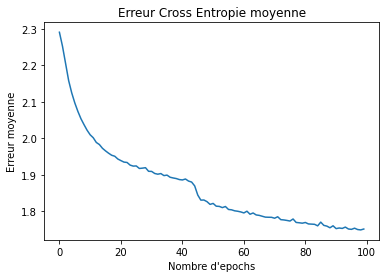

Accuracy  :  0.8134285714285714
Optimisation finie au bout de  145  min


In [4]:
cnn_mnist = Sequentiel([
    Conv1D(k_size=3, chan_in=1, chan_out=32, stride=2, init="xavier"),
    MaxPool1D(2, 2), 
    Flatten(),
    ModuleLineaire(6240, 3000, init="xavier"),
    ReLU(),
    ModuleLineaire(3000, 500, init="xavier"),
    ReLU(),
    ModuleLineaire(500, 100, init="xavier"),
    ReLU(),
    ModuleLineaire(100, 10, init="xavier"),
    SoftMax()
])


opti = Optim(cnn_mnist,CrossEntropieLoss(10), eps=1e-5)
tac = time()
opti.SGD(X_train[:,:,np.newaxis], y_train, taille_batch=59, nb_epochs=100, verbose=True)
tic = time()
opti.affichage(X_train[:,:,np.newaxis],y_train)

print("Optimisation finie au bout de ",int((tic-tac)/60)," min")

In [5]:
print("Accuracy sur le train",opti.getNetwork().accuracy(X_train,Y_train_letrs))
print("Accuracy sur le test",opti.getNetwork().accuracy(X_test,y_test))

NameError: name 'Y_train_letters' is not defined

In [ ]:
net_to_graph(opti.getNetwork(), net_name="networks_images/network_CNN_mnist", horizontal=True)